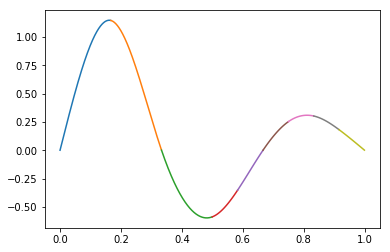

In [1]:
import matplotlib.pyplot as plt
from math import e
from math import pi
from math import sin
from math import cos
from numpy import poly1d, arange

# need some zero vectors...
def zeroV(m):
    z = [0]*m
    return(z)

##########################################
# Cubic spline
##########################################
#INPUT: n; x0, x1, ... ,xn; a0 = f(x0), a1 =f(x1), ... , an = f(xn).
def cubic_spline(n, xn, a):
    """function cubic_spline(n,xn, a, xd) interpolates between the knots
       specified by lists xn and a. The function computes the coefficients
       and outputs the ranges of the piecewise cubic splines."""      

    h = zeroV(n-1)

    # alpha will be values in a system of eq's that will allow us to solve for c
    # and then from there we can find b, d through substitution.
    alpha = zeroV(n-1)

    # l, u, z are used in the method for solving the linear system
    l = zeroV(n+1)
    u = zeroV(n)
    z = zeroV(n+1)

    # b, c, d will be the coefficients along with a.
    b = zeroV(n)     
    c = zeroV(n+1)
    d = zeroV(n)    

    for i in range(n-1):
        # h[i] is used to satisfy the condition that 
        # Si+1(xi+l) = Si(xi+l) for each i = 0,..,n-1
        # i.e., the values at the knots are "doubled up"
        h[i] = xn[i+1]-xn[i]  

    for i in range(1, n-1):
        # Sets up the linear system and allows us to find c.  Once we have 
        # c then b and d follow in terms of it.
        alpha[i] = (3./h[i])*(a[i+1]-a[i])-(3./h[i-1])*(a[i] - a[i-1])

    # I, II, (part of) III Sets up and solves tridiagonal linear system...
    # I   
    l[0] = 1      
    u[0] = 0      
    z[0] = 0

    # II
    for i in range(1, n-1):
        l[i] = 2*(xn[i+1] - xn[i-1]) - h[i-1]*u[i-1]
        u[i] = h[i]/l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1])/l[i]

    l[n] = 1
    z[n] = 0
    c[n] = 0

    # III... also find b, d in terms of c.
    for j in range(n-2, -1, -1):      
        c[j] = z[j] - u[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3.
        d[j] = (c[j+1] - c[j])/(3*h[j]) 

    # Now that we have the coefficients it's just a matter of constructing
    # the appropriate polynomials and graphing.
    for j in range(n-1):
        cub_graph(a[j],b[j],c[j],d[j],xn[j],xn[j+1])

    plt.show()

##########################################
# plot cubic spline
##########################################
def cub_graph(a,b,c,d, x_i, x_i_1):
    """cub_graph takes the i'th coefficient set along with the x[i] and x[i+1]'th
       data pts, and constructs the polynomial spline between the two data pts using
       the poly1d python object (which simply returns a polynomial with a given root."""

    # notice here that we are just building the cubic polynomial piece by piece
    root = poly1d(x_i,True)
    poly = 0
    poly = d*(root)**3
    poly = poly + c*(root)**2
    poly = poly + b*root
    poly = poly + a

    # Set up our domain between data points, and plot the function
    pts = arange(x_i,x_i_1, 0.001)
    plt.plot(pts, poly(pts), '-')
    return


##########################################
# initial values
##########################################
x_vals = [0, 1./6, 1./3, 1./2, 7./12, 2./3, 3./4, 5./6, 11./12, 1]
x_domain = arange(0,2, 1e-2)
fx = zeroV(10)

##########################################
# function for interpolation
##########################################
def sine_func(x):
    return(1.6*e**(-2*x)*sin(3*pi*x))

for i in range(len(x_vals)):
    fx[i] = sine_func(x_vals[i])

##########################################
# show plot
##########################################
cubic_spline(10,x_vals,fx)